In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

print("Libraries imported")

Libraries imported


In [2]:
def plot_predictions(X_train, y_train, X_test, y_test):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10,7))
    plt.scatter(X_train, y_train, s=4, label="Train data")
    plt.scatter(X_test, y_test, s=4, label="Test data")
    plt.scatter(X_test, y_test, s=4, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.show()


##  6.1 Data 

In [3]:
# create some  data using linear regression formula 
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
# split the data 
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

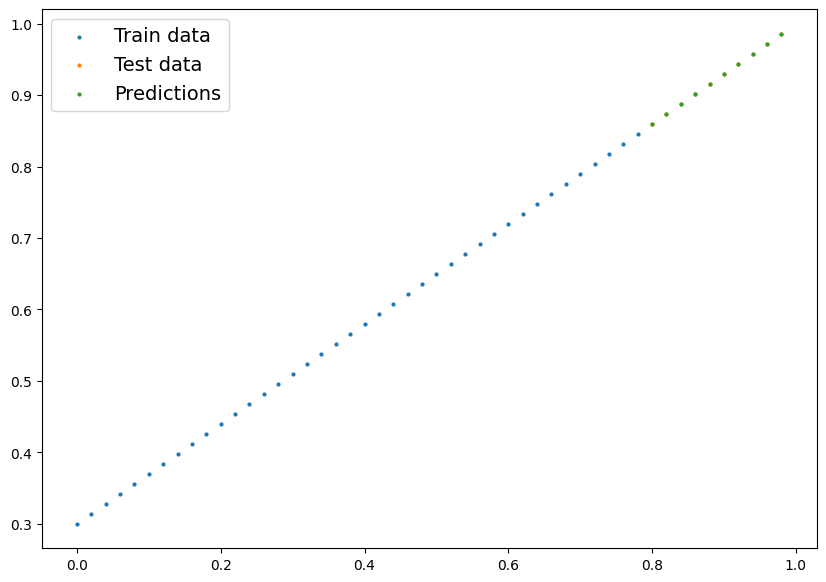

In [5]:
plot_predictions(X_train , y_train , X_test , y_test)

## 6.2 Building a pytorch model

In [6]:
# create a linear model by subclassing 
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # using nn.linear()
        self.linear_layer = nn.Linear(
            in_features=1,out_features=1
        )

    def forward(self , x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [7]:
X_train[:5] , y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [8]:
# set the manual seed 
torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1 , model_1.state_dict

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 <bound method Module.state_dict of LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 )>)

## 6.3 Training 

For training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [10]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [11]:
torch.manual_seed(42)

epochs = 42
for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)
    loss = loss_fn(y_pred , y_train)
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    ### testing 
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred , y_test)

    if epoch % 10 == 0:
        print(f"epoch: {epoch} | Loss: {loss} | test loss: {test_loss}")

epoch: 0 | Loss: 0.5551779866218567 | test loss: 0.5739762187004089
epoch: 10 | Loss: 0.4399680495262146 | test loss: 0.4392663538455963
epoch: 20 | Loss: 0.3247582018375397 | test loss: 0.30455657839775085
epoch: 30 | Loss: 0.20954827964305878 | test loss: 0.16984674334526062
epoch: 40 | Loss: 0.09433844685554504 | test loss: 0.03513689711689949


In [12]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6007]])),
             ('linear_layer.bias', tensor([0.4100]))])

In [13]:
weight , bias

(0.7, 0.3)

## 6.4 making and evaluating predictions 

In [14]:
# Turn model into evaluating mode
model_1.eval()

# making predictions 
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8906],
        [0.9026],
        [0.9146],
        [0.9266],
        [0.9387],
        [0.9507],
        [0.9627],
        [0.9747],
        [0.9867],
        [0.9987]])

In [15]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True , exist_ok=True)

MODEL_NAME = "01_Pytorch _workflow_prjct1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

WindowsPath('models/01_Pytorch _workflow_prjct1.pth')

In [16]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6007]])),
             ('linear_layer.bias', tensor([0.4100]))])

### loading the model

In [17]:
loaded_model =  LinearRegressionModel()

loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model.to()

FileNotFoundError: [Errno 2] No such file or directory: 'models\\01_Pytorch _workflow_prjct1.pth'